In [224]:
# pip3 install pandas numpy matplotlib seaborn scikit-learn joblib

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score, davies_bouldin_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

# Preparing Dataset

In [226]:
df = pd.read_csv("dataGaia2.csv")
print(df.head())

   Unnamed: 0    RA_ICRS    DE_ICRS             Source  e_RA_ICRS  e_DE_ICRS  \
0           0  44.589012   2.195298   1306361548360576     0.0655     0.0612   
1           1  35.358035   8.988813  23700286669971584     0.0658     0.0717   
2           2  44.450767  10.079118  27109837867995776     0.0627     0.0517   
3           3  48.404909  15.105912  31009771252186752     0.0500     0.0421   
4           4  57.092838  11.550927  36876009385300352     0.0521     0.0335   

      Plx   e_Plx     PM   pmRA  ...   Lum-Flame  Mass-Flame  Age-Flame  \
0  0.2384  0.0769  2.901  2.088  ...  298.485140         NaN        NaN   
1  0.1666  0.0785  4.402 -0.242  ...  292.672100         NaN        NaN   
2  0.3544  0.0727  3.154  2.722  ...  506.732800         NaN        NaN   
3  0.5962  0.0557  2.745  2.460  ...    9.055018         NaN        NaN   
4  0.4507  0.0575  4.918 -2.851  ...  311.502840         NaN        NaN   

    z-Flame  Evol  SpType-ELS  Flags-HS     EWHa   e_EWHa  f_EWHa  


In [227]:
df.describe()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,...,Rad-Flame,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,Evol,Flags-HS,EWHa,e_EWHa,f_EWHa
count,626016.000000,626016.000000,626016.000000,6.260160e+05,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,...,611293.000000,611293.000000,590796.000000,544681.000000,611293.000000,590797.000000,626016.000000,626016.000000,626016.000000,626016.000000
mean,48462.184864,114.461886,27.758130,1.034965e+18,0.026891,0.022999,1.466432,0.033111,11.114728,1.332241,...,6.850684,114.628554,1.841872,3.776435,0.445233,364.190439,126.373796,0.158441,0.037198,0.211773
std,29249.820619,103.594052,26.724066,1.373944e+18,0.032805,0.029426,2.015173,0.040997,19.287210,15.950555,...,17.021461,330.115307,1.004918,4.139873,0.233019,238.863381,208.529314,0.227429,0.040021,0.408565
min,0.000000,0.000205,-89.098460,3.865554e+10,0.004400,0.004900,-5.014100,0.008000,0.002000,-584.663000,...,0.046300,0.034732,0.500000,0.200000,0.001505,100.000000,1.000000,-6.651180,0.005400,0.000000
25%,22357.000000,47.123816,18.999283,1.429009e+17,0.014900,0.012300,0.313100,0.018200,2.486000,-2.380000,...,1.343500,2.066952,1.041000,0.524000,0.313836,216.000000,91.000000,0.045490,0.018830,0.000000
50%,47831.500000,68.112694,31.444374,2.277695e+17,0.019600,0.015900,0.850400,0.023600,5.508000,0.059000,...,2.017800,11.679550,1.649000,1.448000,0.480814,286.000000,93.000000,0.147890,0.027910,0.000000
75%,73915.250000,122.131857,43.771117,1.963946e+18,0.026600,0.022100,1.633600,0.032000,10.857000,3.162000,...,3.695100,60.254990,2.462000,6.629000,0.570397,457.000000,94.000000,0.301950,0.039490,0.000000
max,99999.000000,359.998280,89.774031,6.916186e+18,0.801800,0.718500,95.047700,1.056500,688.189000,606.357000,...,181.063300,3499.921000,7.521000,13.500000,1.616032,1735.000000,999.000000,1.883830,3.296320,1.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

In [229]:
df.shape

(626016, 50)

# Encoding Data

In [230]:
# checking for null values

miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

            Missing Values  Missing Percentages
Gmag                     1             0.000160
e_Gmag                   1             0.000160
BPmag                    1             0.000160
e_BPmag                  1             0.000160
GRVSmag             116307            18.578918
e_GRVSmag           116307            18.578918
RV                  115668            18.476844
Rad-Flame            14723             2.351857
Lum-Flame            14723             2.351857
Mass-Flame           35220             5.626054
Age-Flame            81335            12.992479
z-Flame              14723             2.351857
Evol                 35219             5.625895


In [231]:
# checking how many rows were dropped

rows_before = df.shape[0]
df = df.dropna(subset=['e_BPmag', 'BPmag', 'e_Gmag', 'Gmag', 'Rad-Flame', 'Lum-Flame', 'Mass-Flame', 'z-Flame', 'Evol'])
rows_after = df.shape[0]
print(f"Number of rows dropped: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")


Number of rows dropped: 35221
Percentage of rows dropped: 2.8945333334429093%


In [232]:
null_cols = ["GRVSmag", "e_GRVSmag", "RV", "Age-Flame"]
null_df = df[null_cols]
null_df = null_df.fillna(null_df.median())

In [233]:
miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

           Missing Values  Missing Percentages
GRVSmag             81913            13.864877
e_GRVSmag           81913            13.864877
RV                  81407            13.779230
Age-Flame           46115             7.805584


In [234]:
# checking for duplicates

duplicated_df = df.duplicated().sum()
print(duplicated_df)

0


In [235]:
rows_before = df.shape[0]
df = df.dropna(subset=['GRVSmag', 'e_GRVSmag', 'RV', 'Age-Flame'])
rows_after = df.shape[0]
print(f"Number of rows dropped: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")


Number of rows dropped: 86099
Percentage of rows dropped: 7.859398205918625%


In [236]:
miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []


In [237]:
# new df shape
df.shape

(504696, 50)

In [238]:
df_cols = df.columns.tolist()
print(df_cols)

['Unnamed: 0', 'RA_ICRS', 'DE_ICRS', 'Source', 'e_RA_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'GRVSmag', 'e_GRVSmag', 'RV', 'logg', '[Fe/H]', 'Dist', 'PQSO', 'PGal', 'Pstar', 'PWD', 'Pbin', 'Teff', 'A0', 'AG', 'ABP', 'ARP', 'E(BP-RP)', 'GMAG', 'Rad', 'Rad-Flame', 'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame', 'Evol', 'SpType-ELS', 'Flags-HS', 'EWHa', 'e_EWHa', 'f_EWHa']


In [239]:
# categorising columns into numerical columns and categorical

df_dtypes = df.dtypes

numerical_cols = df_dtypes[df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()
categorical_cols = df_dtypes[~df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

sorted_cols = set(numerical_cols + categorical_cols)

print(f"Numerical Columns: {len(numerical_cols)}, Categorical Columns: {len(categorical_cols)}")
print(f"Total Categorised Columns: {len(sorted_cols)}")
print(f"Number of missing columns in categorised dataframes: {len(set(df.columns)) - len(sorted_cols)}")

Numerical Columns: 49, Categorical Columns: 1
Total Categorised Columns: 50
Number of missing columns in categorised dataframes: 0


In [240]:
# checking types of values in categorical column

print(categorical_cols)
unique_values = df[categorical_cols].stack().unique()
print(unique_values)

['SpType-ELS']
['B      ' 'A      ' 'F      ' 'G      ' 'K      ' 'M      ']


In [241]:
# considering to hot encode (target column) - would not work for most models 

# data_a = pd.get_dummies(df["SpType-ELS"], dtype=int, drop_first=True)
# data_b = df.drop(columns=["SpType-ELS"])

# df = pd.concat([data_a, data_b], axis=1)

In [242]:
print(df.iloc[:, 0])

26017         1
26022         6
26023         7
26025         9
26027        11
          ...  
626011    99995
626012    99996
626013    99997
626014    99998
626015    99999
Name: Unnamed: 0, Length: 504696, dtype: int64


In [243]:
# dropping useless columns

df = df.drop(columns=['Source'])
df = df.drop(columns=["Unnamed: 0"])

In [244]:
# new df shape

df.shape

(504696, 48)

# Plots

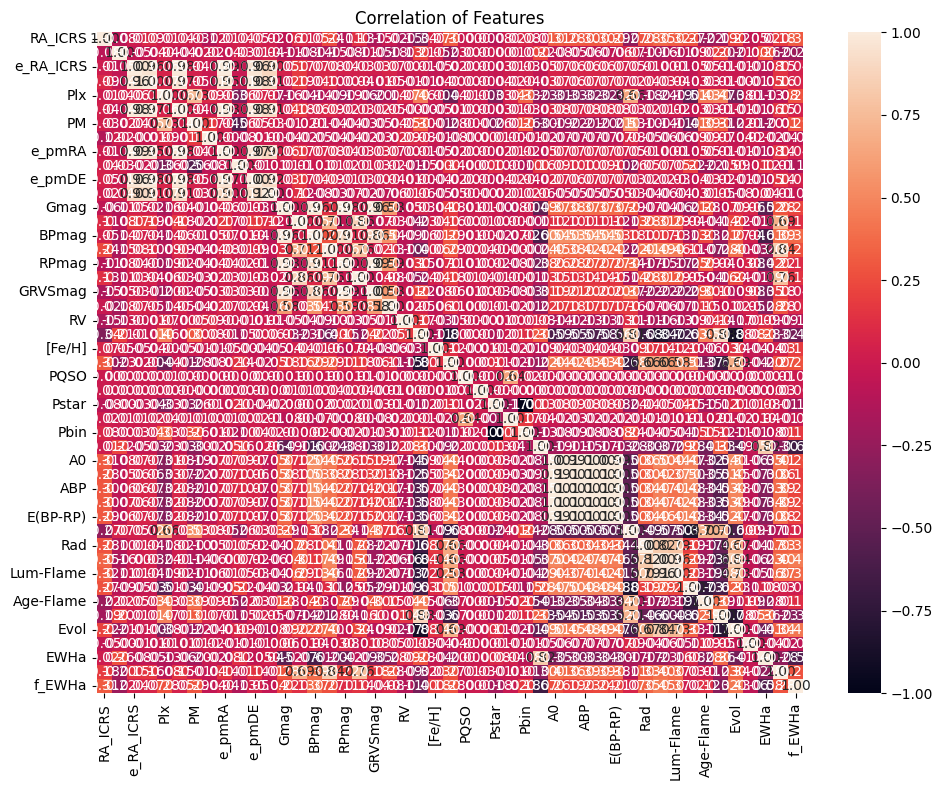

In [245]:
# plot with every feature

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Correlation of Features")
plt.tight_layout()
plt.show()

Subset columns:  ['RA_ICRS', 'DE_ICRS', 'e_RA_ICRS', 'e_DE_ICRS', 'Plx', 'SpType-ELS-encoded']


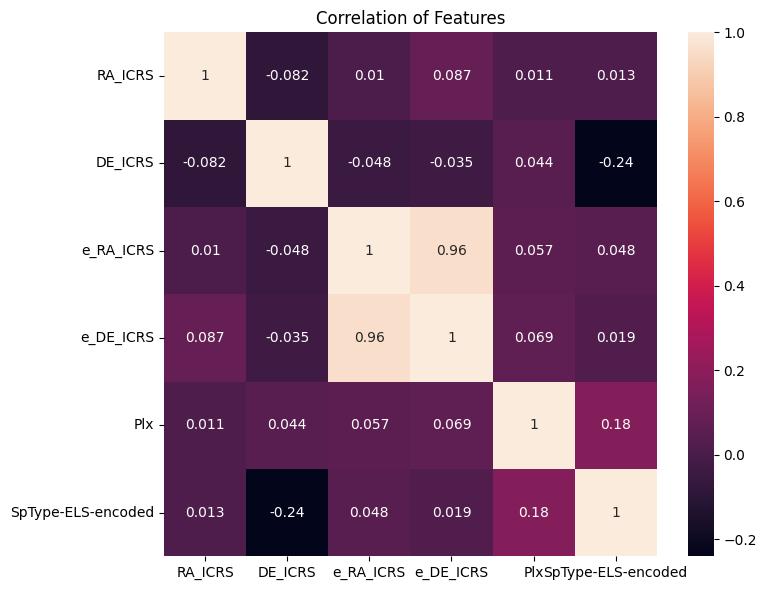

Subset columns:  ['e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'SpType-ELS-encoded']


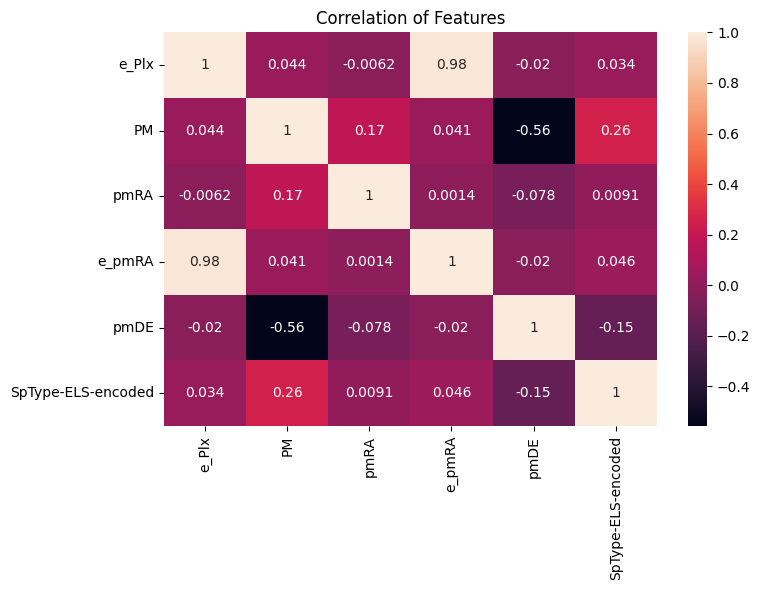

Subset columns:  ['e_pmDE', 'RUWE', 'Gmag', 'e_Gmag', 'BPmag', 'SpType-ELS-encoded']


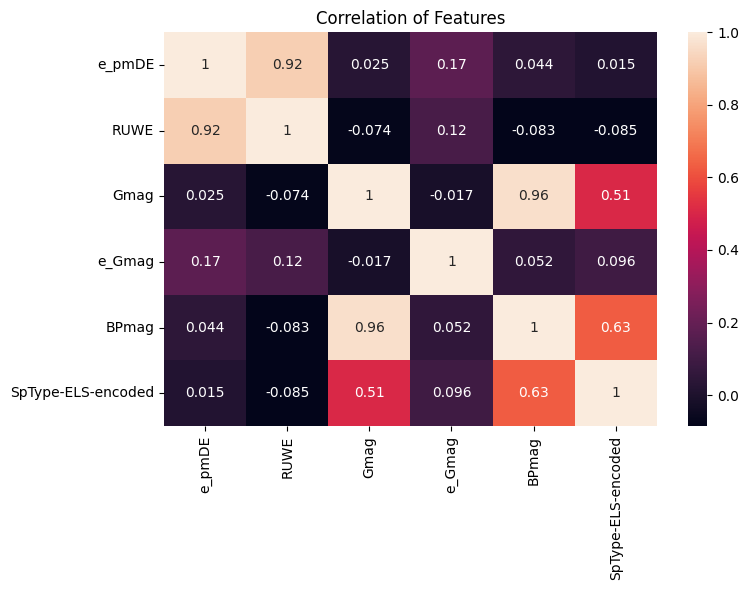

Subset columns:  ['e_BPmag', 'RPmag', 'e_RPmag', 'GRVSmag', 'e_GRVSmag', 'SpType-ELS-encoded']


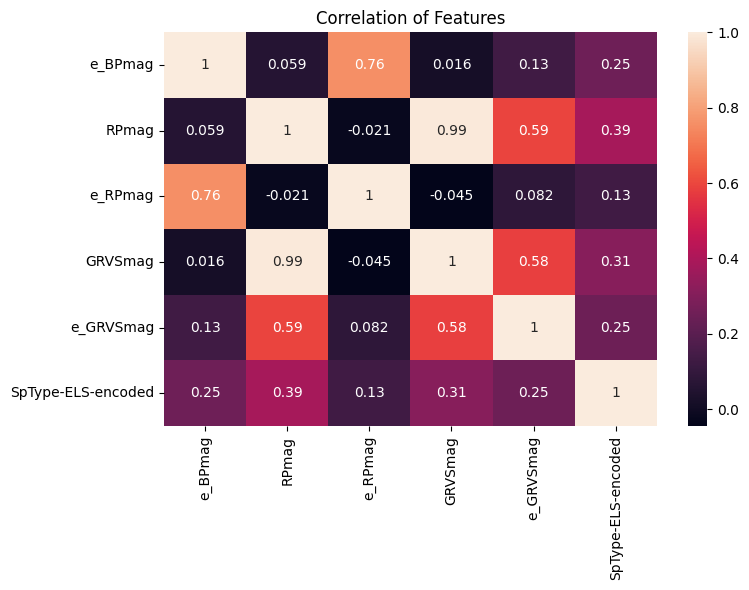

Subset columns:  ['RV', 'logg', '[Fe/H]', 'Dist', 'PQSO', 'SpType-ELS-encoded']


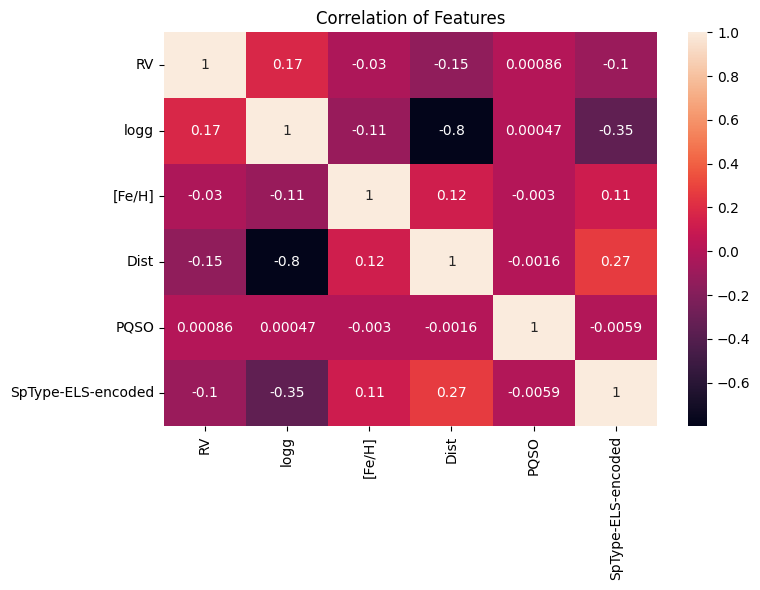

Subset columns:  ['PGal', 'Pstar', 'PWD', 'Pbin', 'Teff', 'SpType-ELS-encoded']


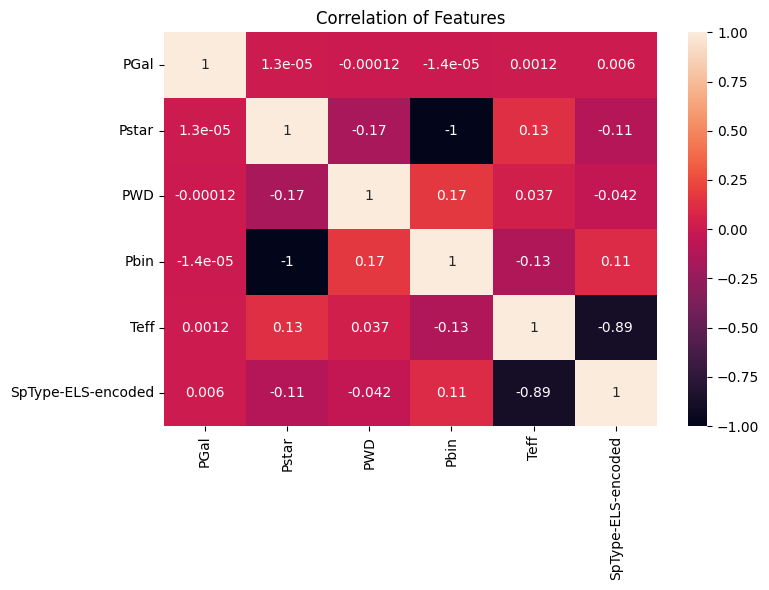

Subset columns:  ['A0', 'AG', 'ABP', 'ARP', 'E(BP-RP)', 'SpType-ELS-encoded']


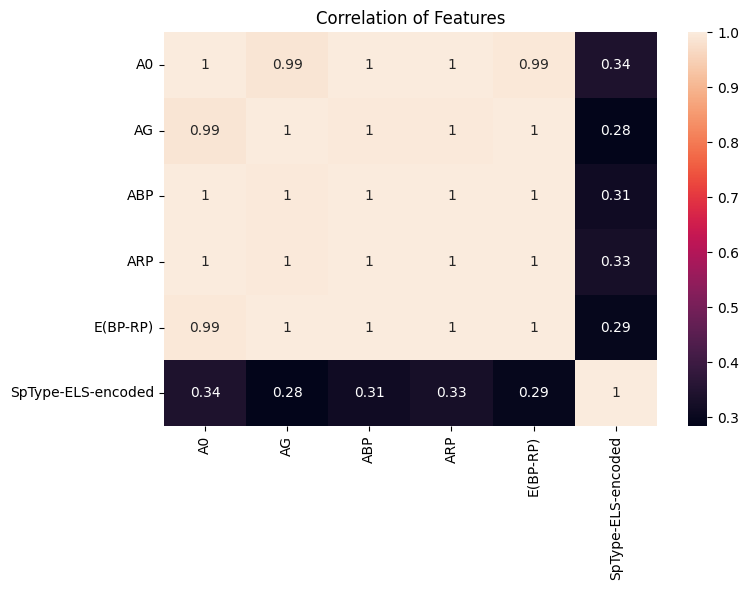

Subset columns:  ['GMAG', 'Rad', 'Rad-Flame', 'Lum-Flame', 'Mass-Flame', 'SpType-ELS-encoded']


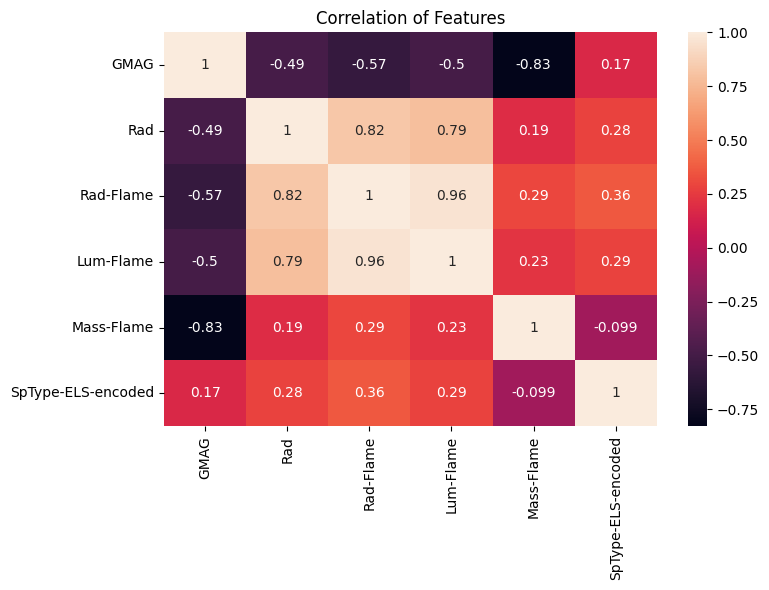

Subset columns:  ['Age-Flame', 'z-Flame', 'Evol', 'SpType-ELS', 'Flags-HS', 'SpType-ELS-encoded']


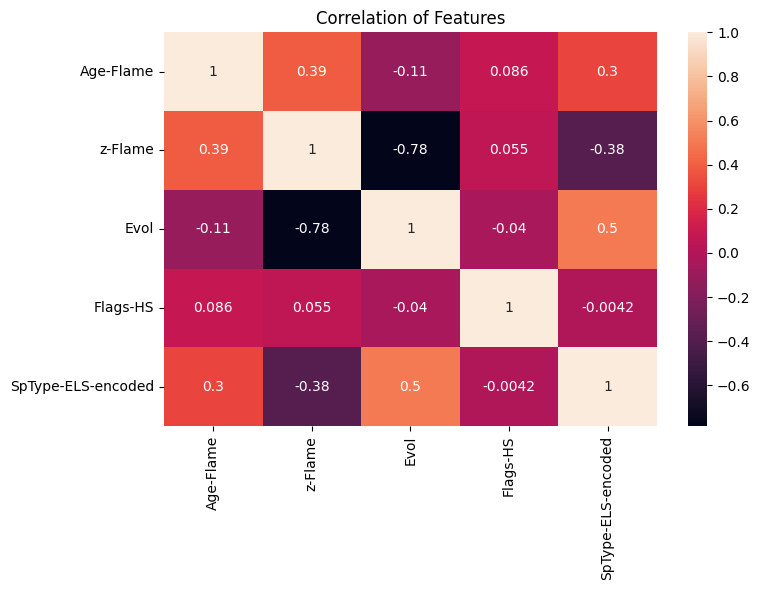

Subset columns:  ['EWHa', 'e_EWHa', 'f_EWHa', 'SpType-ELS-encoded', 'SpType-ELS-encoded']


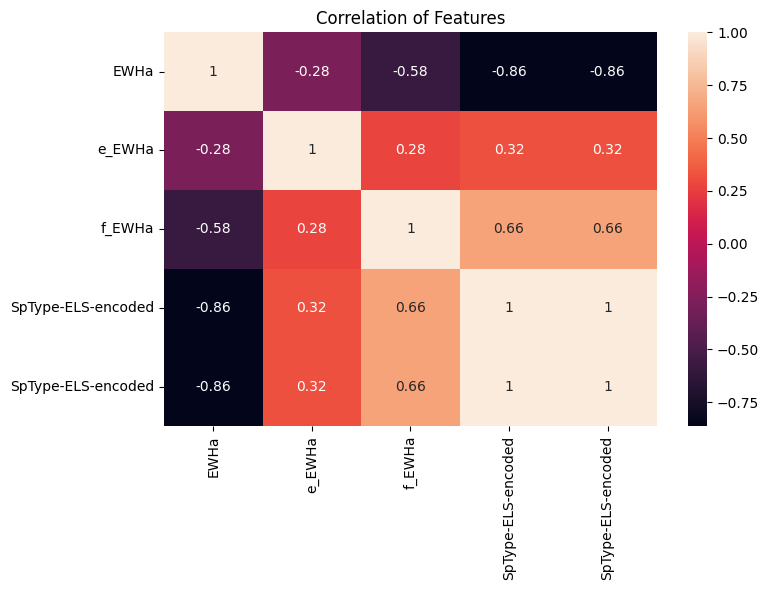

In [246]:
# inefficient, but making multiple separate scatter plots
le = LabelEncoder()
df_le = df.copy()
df_le["SpType-ELS-encoded"] = le.fit_transform(df["SpType-ELS"])

for i in range (0, df_le.shape[1], 5):
    subset = df_le.iloc[:, i:i+5]
    subset = pd.concat([subset, df_le["SpType-ELS-encoded"]], axis=1)
    print("Subset columns: ", subset.columns.tolist())

    corr = subset.corr(numeric_only=True)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True)
    plt.title("Correlation of Features")
    plt.tight_layout()
    plt.show()

columns that have low correlation with SpType: 
['RA_ICRS', 'e_RA_ICRS', 'e_PIx', 'pmRA', 'e_pmRA', 'e_Gmag', 'e_RPmag', 'RV', '[Fe/H]', 'PQSO', 'PGal', 'Pstar', 'PWD', 'Pbin', 'Mass-Flame', 'Flags-HS']

In [247]:
df = df.drop(columns=['Mass-Flame', 'RA_ICRS', 'e_RA_ICRS', 'e_Plx', 'pmRA', 'e_pmRA', 'e_Gmag', 'e_RPmag', 'RV', '[Fe/H]', 'PQSO', 'PGal', 'Pstar', 'PWD', 'Pbin', 'Mass-Flame', 'Flags-HS'])

In [248]:
df.shape

(504696, 32)

# Models

In [249]:
x = df.drop(columns=['SpType-ELS'])
y = df["SpType-ELS"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [250]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.8764216366158114
Confusion Matrix: 
 [[19629    68   218    24     0     3]
 [  190   795     0     0     0     0]
 [  456     3 16198  3374   112     5]
 [    4     0  3393 14901  1339   101]
 [    2     0    78  1878 17518   529]
 [    9     0    27   132   529 19425]]


# Creating sub-sets of data

Spectral Class is identified by the column "SpType-ELS", user would need to input temperature "teff" and luminosity "Lum-Flame". Luminosity Class can be determined from mass "Mass-Flame", radius "Rad", and absolute magnitude "GMAG", which could be calculated using: distance in parsecs "Dist", and apparent magnitude "Gmag".

Model must be trained only on those features, assuming user calculates absolute magnitude themselves - if not, we could create a calculator that does this for them.

In [251]:
# Spectral Class Model

raw = df.copy()

reduced_cols_sc = ['Teff', 'Lum-Flame', 'SpType-ELS', 'Rad', 'GMAG']
df_reduced_sc = df[reduced_cols_sc]

x = df_reduced_sc.drop(columns=['SpType-ELS'])
y = df["SpType-ELS"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [252]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7880523083019616
Confusion Matrix: 
 [[18868   120   806    75    62    11]
 [  300   685     0     0     0     0]
 [ 1094     3 13705  5252    93     1]
 [  146     0  3399 14731  1427    35]
 [  128     0   146  2822 14875  2034]
 [  200     5    49   475  2711 16682]]


In [253]:
lr.coef_

array([[  7.35919705, -10.00829545,  -3.30749497,  -1.54589034],
       [ 15.15281906, -11.08396235,   2.45726304,  -4.59277635],
       [  0.70685564, -10.1841388 , -19.80606578,  -0.15964311],
       [ -2.90270792,   5.60706627,   5.13336555,   2.65252968],
       [ -9.14185658,  10.77833557,   6.35049261,   1.21276107],
       [-11.17430725,  14.89099475,   9.17243957,   2.43301904]])

In [254]:
print(df["SpType-ELS"].unique())

['B      ' 'A      ' 'F      ' 'G      ' 'K      ' 'M      ']


In [255]:
# Luminosity class unsupervised learning clusterring

reduced_cols_lm = ['Teff', 'Lum-Flame', 'Rad', 'GMAG', 'SpType-ELS']
df_reduced_lm = df[reduced_cols_lm]

# Creating dataframes for each spectral class

df_B = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'B      ']
df_A = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'A      ']
df_F = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'F      ']
df_G = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'G      ']
df_K = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'K      ']
df_M = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'M      ']

missing_sp_rows = df.shape[0] - (df_B.shape[0] + df_A.shape[0] + df_F.shape[0] + df_G.shape[0] + df_K.shape[0] + df_M.shape[0])
print("Missing rows from data subsets: ", missing_sp_rows)


Missing rows from data subsets:  0


In [256]:
df_A = pd.get_dummies(df_A, columns=["SpType-ELS"], drop_first=True)
df_B = pd.get_dummies(df_B, columns=["SpType-ELS"], drop_first=True)
df_G = pd.get_dummies(df_G, columns=["SpType-ELS"], drop_first=True)
df_F = pd.get_dummies(df_F, columns=["SpType-ELS"], drop_first=True)
df_K = pd.get_dummies(df_K, columns=["SpType-ELS"], drop_first=True)
df_M = pd.get_dummies(df_M, columns=["SpType-ELS"], drop_first=True)

scaler = StandardScaler()
x_scaled_b = scaler.fit_transform(df_B)
scaler = StandardScaler()
x_scaled_a = scaler.fit_transform(df_A)
scaler = StandardScaler()
x_scaled_f = scaler.fit_transform(df_F)
scaler = StandardScaler()
x_scaled_g = scaler.fit_transform(df_G)
scaler = StandardScaler()
x_scaled_k = scaler.fit_transform(df_K)
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(df_M)
scaled_list = [x_scaled_a, x_scaled_b, x_scaled_g, x_scaled_f, x_scaled_k, x_scaled_m]

K-Means Model

In [257]:
intertias = []
silhouettes = []
K_range = range(2, 10)

# make it more interesting - double loop -> object looping "const[a, b]"
for x in scaled_list:
    for k in K_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels_km = km.fit_predict(x)

        intertias.append(km.inertia_)
        silhouettes.append(silhouette_score(x, labels_km, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
        # silhouettes.append(5)

    print(f"K\tIntertias\t\tSilhouettes")
    for k, i, s in zip(K_range, intertias, silhouettes):
        print(f"{k}\t{i:.2f}\t\t{s:.3f}")
    intertias = []
    silhouettes = []

K	Intertias		Silhouettes
2	250597.71		0.462
3	179532.59		0.462
4	149703.11		0.438
5	126789.94		0.434
6	113395.06		0.382
7	99779.24		0.381
8	88724.51		0.383
9	80022.49		0.338
K	Intertias		Silhouettes
2	10527.71		0.419
3	7708.95		0.388
4	6209.56		0.371
5	5345.16		0.349
6	4687.52		0.350
7	4095.01		0.338
8	3726.76		0.321
9	3390.88		0.329
K	Intertias		Silhouettes
2	232117.77		0.773
3	177039.03		0.446
4	149916.18		0.379
5	125941.78		0.341
6	107216.52		0.374
7	97013.86		0.376
8	88191.16		0.385
9	79686.04		0.394
K	Intertias		Silhouettes
2	256581.07		0.451
3	193554.44		0.447
4	156876.16		0.378
5	133910.42		0.349
6	116035.12		0.370
7	101754.81		0.364
8	89061.10		0.346
9	81004.03		0.345
K	Intertias		Silhouettes
2	246028.96		0.377
3	189253.86		0.376
4	153388.98		0.348
5	120173.01		0.377
6	103673.79		0.363
7	94216.57		0.366
8	85202.60		0.360
9	77726.02		0.359
K	Intertias		Silhouettes
2	230054.85		0.495
3	129909.71		0.607
4	86395.28		0.640
5	65702.72		0.645
6	49252.68		0.654
7	43078.01		0.632
8	3766

no clear trend between luminosity classes and clusters from datasets.

In [258]:
# Agglomeretive Clustering

k = 3
linkages = ['ward', 'average', 'complete']
b_s_score = 0
best_linkage = None

for linkage in linkages:
    agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    agg_labels = agg.fit_predict(x_scaled_b)
    s_score = silhouette_score(x_scaled_b, agg_labels)

    print("Linkage: ", linkage)
    print("Agg clusters: ", np.bincount(agg_labels))
    print("Silhouette Score: ", s_score)
    print("\n")

    if s_score > b_s_score:
        b_s_score = s_score
        best_linkage = linkage



Linkage:  ward
Agg clusters:  [3184  908  605]
Silhouette Score:  0.38024670293120666


Linkage:  average
Agg clusters:  [   2    1 4694]
Silhouette Score:  0.8209496572452901


Linkage:  complete
Agg clusters:  [4694    1    2]
Silhouette Score:  0.8209496572452901




In [259]:
df_B_gmag = pd.DataFrame({
    "gmag": round(df_B["GMAG"], 1),
    "clusters": agg_labels
})

print(df_B_gmag.groupby("clusters")["gmag"].mean())
print(df_B_gmag.groupby("clusters")["gmag"].median())

clusters
0    0.040413
1   -0.600000
2   -3.150000
Name: gmag, dtype: float64
clusters
0    0.10
1   -0.60
2   -3.15
Name: gmag, dtype: float64


Agglomeretive clustering showed B-Type stars to have absolute magnitudes outside realistic range for stars of that type, meanign Gaia's estimates are noisy and unreliable for this porject. The subset-dataframes must be created manually by using temperature. 

# Restarted from scratch

In [406]:
data = pd.read_csv("dataGaia2.csv")
print(data.shape) # confirming raw data

(626016, 50)


In [407]:
data.columns.tolist()

['Unnamed: 0',
 'RA_ICRS',
 'DE_ICRS',
 'Source',
 'e_RA_ICRS',
 'e_DE_ICRS',
 'Plx',
 'e_Plx',
 'PM',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'RUWE',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GRVSmag',
 'e_GRVSmag',
 'RV',
 'logg',
 '[Fe/H]',
 'Dist',
 'PQSO',
 'PGal',
 'Pstar',
 'PWD',
 'Pbin',
 'Teff',
 'A0',
 'AG',
 'ABP',
 'ARP',
 'E(BP-RP)',
 'GMAG',
 'Rad',
 'Rad-Flame',
 'Lum-Flame',
 'Mass-Flame',
 'Age-Flame',
 'z-Flame',
 'Evol',
 'SpType-ELS',
 'Flags-HS',
 'EWHa',
 'e_EWHa',
 'f_EWHa']

# Creating Subset-DataFrames for each Spectral Class

In [408]:
data = data.drop(columns=["SpType-ELS"])

data_o = data[data["Teff"] >= 30000]
data_b = data[(data["Teff"] >= 10000) & (data["Teff"] < 30000)] 
data_a = data[(data["Teff"] >= 7500) & (data["Teff"] < 10000)] 
data_f = data[(data["Teff"] >= 6000) & (data["Teff"] < 7500)] 
data_g = data[(data["Teff"] >= 5200) & (data["Teff"] < 6000)] 
data_k = data[(data["Teff"] >= 3700) & (data["Teff"] < 5200)] 
data_m = data[(data["Teff"] >= 2400) & (data["Teff"] < 3700)] 

print("Data Type-O: \n ", data_o.count())
print("\n Data Type-B: \n ", data_b.count())
print("\n Data Type-A: \n ", data_a.count())
print("\n Data Type-F: \n ", data_f.count())
print("\n Data Type-G: \n ", data_g.count())
print("\n Data Type-K: \n ", data_k.count())
print("\n Data Type-M: \n ", data_m.count())


Data Type-O: 
  Unnamed: 0    2557
RA_ICRS       2557
DE_ICRS       2557
Source        2557
e_RA_ICRS     2557
e_DE_ICRS     2557
Plx           2557
e_Plx         2557
PM            2557
pmRA          2557
e_pmRA        2557
pmDE          2557
e_pmDE        2557
RUWE          2557
Gmag          2557
e_Gmag        2557
BPmag         2557
e_BPmag       2557
RPmag         2557
e_RPmag       2557
GRVSmag         71
e_GRVSmag       71
RV              93
logg          2557
[Fe/H]        2557
Dist          2557
PQSO          2557
PGal          2557
Pstar         2557
PWD           2557
Pbin          2557
Teff          2557
A0            2557
AG            2557
ABP           2557
ARP           2557
E(BP-RP)      2557
GMAG          2557
Rad           2557
Rad-Flame        0
Lum-Flame        0
Mass-Flame       0
Age-Flame        0
z-Flame          0
Evol             0
Flags-HS      2557
EWHa          2557
e_EWHa        2557
f_EWHa        2557
dtype: int64

 Data Type-B: 
  Unnamed: 0    94401
RA

In [409]:
# need to add target column, then recombine data into one dataset

data_o["classification"] = "o"
data_b["classification"] = "b"
data_a["classification"] = "a"
data_f["classification"] = "f"
data_g["classification"] = "g"
data_k["classification"] = "k"
data_m["classification"] = "m"

data_combined = pd.concat([data_o,data_b,data_a,data_f,data_g,data_k,data_m])
print(data_combined["classification"].unique())

['o' 'b' 'a' 'f' 'g' 'k' 'm']


/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_82374/218065458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o["classification"] = "o"
/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_82374/218065458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b["classification"] = "b"
/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_82374/218065458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [410]:
columns = ['RA_ICRS',
 'DE_ICRS',
 'Source',
 'e_RA_ICRS',
 'e_DE_ICRS',
 'Plx',
 'e_Plx',
 'PM',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'RUWE',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GRVSmag',
 'e_GRVSmag',
 'RV',
 'logg',
 '[Fe/H]',
 'Dist',
 'PQSO',
 'PGal',
 'Pstar',
 'PWD',
 'Pbin',
 'Teff',
 'A0',
 'AG',
 'ABP',
 'ARP',
 'E(BP-RP)',
 'GMAG',
 'Rad',
 'Rad-Flame',
 'Lum-Flame',
 'Mass-Flame',
 'Age-Flame',
 'z-Flame',
 'Evol',
 'SpType-ELS',
 'Flags-HS',
 'EWHa',
 'e_EWHa',
 'f_EWHa']

Pre-Processing for each dataset

In [411]:
# O-type

data_o = data_o.drop(columns=['Lum-Flame', "Rad-Flame", 'Age-Flame', 'z-Flame', 'Evol', 'GRVSmag', 'e_GRVSmag', 'RV' ])
data_o_cols = data_o.columns.tolist()

# B-type

data_b = data_b.drop(columns=['RV', 'Age-Flame', 'GRVSmag', 'e_GRVSmag', 'Evol'])
data_b_cols = data_b.columns.tolist()

rows_before = data_b.shape[0]
data_b = data_b.dropna(subset=['Mass-Flame', 'z-Flame', 'Lum-Flame', 'Rad-Flame'])
rows_after = data_b.shape[0]
print(f"Number of rows dropped from Type-B: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")

# A-type

data_a = data_a.drop(columns=['RV', 'GRVSmag', 'e_GRVSmag', 'Evol'])
data_a_cols = data_a.columns.tolist()

rows_before = data_a.shape[0]
data_a = data_a.dropna(subset=['Mass-Flame', 'Rad-Flame', 'Lum-Flame', 'Age-Flame', 'z-Flame'])
rows_after = data_a.shape[0]
print(f"Number of rows dropped from Type-A: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")

# M-type

rows_before = data_m.shape[0]
data_m = data_m.dropna(subset=['Gmag', 'e_Gmag', 'BPmag', 'e_BPmag'])
rows_after = data_m.shape[0]
print(f"Number of rows dropped from Type-A: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")



Number of rows dropped from Type-B: 27013
Percentage of rows dropped: 16.696437953136492%
Number of rows dropped from Type-A: 9851
Percentage of rows dropped: 5.258157323042269%
Number of rows dropped from Type-A: 1
Percentage of rows dropped: 0.0018077625323137552%


In [412]:
# inefficient, but making multiple separate scatter plots
le = LabelEncoder()
data_combined_num = data_combined.copy()
data_combined_num["classification_number"] = le.fit_transform(data_combined["classification"])
data_combined_num = data_combined_num.drop(columns=["classification"])

# for i in range (0, data_combined.shape[1], 5):
#     subset = data_combined.iloc[:, i:i+5]
#     subset = pd.concat([subset, data_combined["classification"]], axis=1)
#     print("Subset columns: ", subset.columns.tolist())

#     corr = subset.corr(numeric_only=True)

#     plt.figure(figsize=(8, 6))
#     sns.heatmap(corr, annot=True)
#     plt.title("Correlation of Features")
#     plt.tight_layout()
#     plt.show()

In [413]:
correlations = data_combined_num.corr()["classification_number"].abs().sort_values(ascending=False)
correlation_list = correlations[correlations<0.3].index.tolist()
print(correlation_list)

['GRVSmag', 'BPmag', 'Plx', 'Rad', 'DE_ICRS', '[Fe/H]', 'e_GRVSmag', 'pmDE', 'Gmag', 'e_BPmag', 'Pbin', 'AG', 'Dist', 'Lum-Flame', 'e_Gmag', 'E(BP-RP)', 'RV', 'Flags-HS', 'PWD', 'e_EWHa', 'pmRA', 'e_pmDE', 'ABP', 'Pstar', 'e_DE_ICRS', 'RUWE', 'Source', 'e_Plx', 'RA_ICRS', 'RPmag', 'ARP', 'e_RPmag', 'e_pmRA', 'e_RA_ICRS', 'PGal', 'A0', 'PQSO', 'Unnamed: 0']


In [414]:
cols_to_drop = ['PM', 'logg', 'Rad', 'Plx', 'Gmag', 'e_EWHa', 'e_BPmag', 'pmDE', '[Fe/H]', 'RPmag', 'Pstar', 'Pbin', 'e_Gmag', 'RV', 'e_RPmag', 'Lum-Flame', 'Flags-HS', 'AG', 'E(BP-RP)', 'e_GRVSmag', 'pmRA', 'e_RA_ICRS', 'e_pmRA', 'PWD', 'RUWE', 'Unnamed: 0', 'Dist', 'A0', 'RA_ICRS', 'PQSO', 'ABP', 'GRVSmag', 'e_Plx', 'e_DE_ICRS', 'Source', 'e_pmDE', 'PGal', 'ARP']
print(data_combined.shape)
data_combined = data_combined.drop(columns=cols_to_drop)
print(data_combined.shape)

(626016, 50)
(626016, 12)


In [415]:
data_o = data_combined[data_combined["classification"] == 'o']
data_b = data_combined[data_combined["classification"] == 'b']
data_a = data_combined[data_combined["classification"] == 'a'] 
data_f = data_combined[data_combined["classification"] == 'f']
data_g = data_combined[data_combined["classification"] == 'g']
data_k = data_combined[data_combined["classification"] == 'k']
data_m = data_combined[data_combined["classification"] == 'm'] 

In [416]:
print(data_o.shape)
print(data_b.shape)
print(data_a.shape)
print(data_f.shape)
print(data_g.shape)
print(data_k.shape)
print(data_m.shape)

(2557, 12)
(94401, 12)
(98599, 12)
(110540, 12)
(165593, 12)
(126667, 12)
(27659, 12)


In [417]:
data_cols = data.columns.tolist()
data_o_cols = data_o.columns.tolist()
data_b_cols = data_b.columns.tolist()
data_a_cols = data_a.columns.tolist()

In [418]:
# O-type
data_o = data_o.drop(columns=["Mass-Flame", "Rad-Flame", 'Age-Flame', 'z-Flame', 'Evol',])
data_o_cols = data_o.columns.tolist()

# B-type

data_b = data_b.drop(columns=['Age-Flame', 'Evol'])
data_b_cols = data_b.columns.tolist()

rows_before = data_b.shape[0]
data_b = data_b.dropna(subset=['Mass-Flame', 'z-Flame', 'Rad-Flame'])
rows_after = data_b.shape[0]
print(f"Number of rows dropped from Type-B: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")

# A-type

data_a = data_a.drop(columns=['Evol'])
data_a_cols = data_a.columns.tolist()

rows_before = data_a.shape[0]
data_a = data_a.dropna(subset=['Mass-Flame', 'Rad-Flame', 'Age-Flame', 'z-Flame'])
rows_after = data_a.shape[0]
print(f"Number of rows dropped from Type-A: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")

# M-type

rows_before = data_m.shape[0]
data_m = data_m.dropna(subset=['BPmag',])
rows_after = data_m.shape[0]
print(f"Number of rows dropped from Type-A: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")



Number of rows dropped from Type-B: 27013
Percentage of rows dropped: 16.696437953136492%
Number of rows dropped from Type-A: 9851
Percentage of rows dropped: 5.258157323042269%
Number of rows dropped from Type-A: 1
Percentage of rows dropped: 0.0018077625323137552%


In [419]:
all_data = [data_o, data_b, data_a, data_f, data_g, data_k, data_m]
for data in all_data:
    miss_values = data.isnull().sum()
    miss_perc = (miss_values / len(data) ) * 100
    miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
    print(miss_df[miss_df['Missing Values'] > 0])


Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []
Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []


In [420]:
data_o = data_o.drop(columns=['classification'])
data_b = data_b.drop(columns=['classification'])
data_a = data_a.drop(columns=['classification'])
data_f = data_f.drop(columns=['classification'])
data_g = data_g.drop(columns=['classification'])
data_k = data_k.drop(columns=['classification'])
data_m = data_m.drop(columns=['classification'])

all_data = [data_o, data_b, data_a, data_f, data_g, data_k, data_m]

In [422]:
# testing to see if data is good 

data_b["Mass-Flame"].sort_values()

112691    1.852
298532    1.891
80494     1.902
98519     2.049
47790     2.082
          ...  
108091    7.434
122384    7.436
77536     7.448
59275     7.476
14045     7.521
Name: Mass-Flame, Length: 67388, dtype: float64

In [423]:
scaler_o = StandardScaler()
x_scaled_o = scaler_o.fit_transform(data_o)
scaler_b = StandardScaler()
x_scaled_b = scaler_b.fit_transform(data_b)
scaler_a = StandardScaler()
x_scaled_a = scaler_a.fit_transform(data_a)
scaler_f = StandardScaler()
x_scaled_f = scaler_f.fit_transform(data_f)
scaler_g = StandardScaler()
x_scaled_g = scaler_g.fit_transform(data_g)
scaler_k = StandardScaler()
x_scaled_k = scaler_k.fit_transform(data_k)
scaler_m = StandardScaler()
x_scaled_m = scaler_m.fit_transform(data_m)
scaled_list = [x_scaled_a, x_scaled_b, x_scaled_g, x_scaled_f, x_scaled_k, x_scaled_m]

In [424]:
# K-means

intertias = []
silhouettes = []
K_range = range(2, 10) # should expect to see 3 or 5


for x in all_data:
    for k in K_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels_km = km.fit_predict(x)

        intertias.append(km.inertia_)
        silhouettes.append(silhouette_score(x, labels_km, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))

    print(f"K\tIntertias\t\tSilhouettes")
    for k, i, s in zip(K_range, intertias, silhouettes):
        print(f"{k}\t{i:.2f}\t\t{s:.3f}")
    
    intertias = [] # reset lists
    silhouettes = []

K	Intertias		Silhouettes
2	5482503541.04		0.626
3	2716327007.31		0.578
4	1631180854.39		0.573
5	894423773.72		0.597
6	558451325.88		0.606
7	417450477.96		0.595
8	297379095.49		0.607
9	248014618.78		0.606
K	Intertias		Silhouettes
2	59740885047.95		0.739
3	31879531126.87		0.661
4	17713788208.09		0.673
5	11168421256.51		0.639
6	8311014021.63		0.629
7	5686673423.57		0.637
8	4236963477.41		0.618
9	3501704892.77		0.609
K	Intertias		Silhouettes
2	10941105583.03		0.710
3	4414129051.19		0.677
4	2548420083.24		0.619
5	1663515342.41		0.600
6	1198704037.22		0.586
7	913031278.47		0.547
8	684432367.95		0.545
9	556960890.95		0.537
K	Intertias		Silhouettes
2	5734202278.13		0.666
3	2727805898.17		0.586
4	1819339077.42		0.530
5	1279347633.00		0.493
6	1013944971.71		0.477
7	884459309.45		0.440
8	780421430.51		0.410
9	698631917.55		0.387
K	Intertias		Silhouettes
2	3965040250.33		0.514
3	2847023442.04		0.402
4	2254108573.92		0.412
5	1794962977.07		0.413
6	1444744666.79		0.390
7	1279513806.90		0.393
8	11314

In [426]:
data_o_cols

['DE_ICRS', 'BPmag', 'Teff', 'GMAG', 'EWHa', 'f_EWHa', 'classification']

In [425]:


km_o = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_o = km_o.fit_predict(x_scaled_o)

df_clusters_o = data_o.copy()
df_clusters_o["Clusters"] = labels_o

print(df_clusters_o["Clusters"].value_counts().sort_index())

centres_scaled = km_o.cluster_centers_
centres = pd.DataFrame(scaler_o.inverse_transform(centres_scaled), columns=data_o_cols)
centres = centres[['Teff', 'Rad', 'GMAG']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0    1216
1     855
2     486
Name: count, dtype: int64


ValueError: Shape of passed values is (3, 6), indices imply (3, 7)

In [399]:
km_b = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_b = km_b.fit_predict(x_scaled_b)

df_clusters_b = data_b.copy()
df_clusters_b["Clusters"] = labels_b

print(df_clusters_b["Clusters"].value_counts().sort_index())

centres_scaled = km_b.cluster_centers_
centres = pd.DataFrame(scaler_b.inverse_transform(centres_scaled), columns=data_b.columns)
centres = centres[['GMAG']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0    31652
1    12131
2    23605
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG
Cluster      
0       -0.47
1       -1.86
2        0.72


In [100]:
km_a = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_a = km_a.fit_predict(x_scaled_a)

df_clusters_a = data_a.copy()
df_clusters_a["Clusters"] = labels_a

print(df_clusters_a["Clusters"].value_counts().sort_index())

centres_scaled = km_a.cluster_centers_
centres = pd.DataFrame(scaler_a.inverse_transform(centres_scaled), columns=data_a_cols)
centres = centres[['Teff', 'Rad', 'GMAG', 'Mass-Flame']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0     1395
1    59393
2    27960
Name: count, dtype: int64

 Cluster centres (original units: )
            Teff   Rad  GMAG  Mass-Flame
Cluster                                 
0        8583.87  3.23  0.86        2.25
1        8443.07  2.40  1.32        2.06
2        9275.83  3.32  0.42        2.49


In [99]:
km_f = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_f = km_f.fit_predict(x_scaled_f)

df_clusters_f = data_f.copy()
df_clusters_f["Clusters"] = labels_f

print(df_clusters_f["Clusters"].value_counts().sort_index())

centres_scaled = km_f.cluster_centers_
centres = pd.DataFrame(scaler_f.inverse_transform(centres_scaled), columns=data_cols)
centres = centres[['Teff', 'Rad', 'GMAG', 'Mass-Flame']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0     9618
1    71277
2    29645
Name: count, dtype: int64

 Cluster centres (original units: )
            Teff   Rad  GMAG  Mass-Flame
Cluster                                 
0        6486.43  7.91 -0.02        2.63
1        6516.34  1.81  2.97        1.41
2        6963.97  2.34  2.19        1.65


In [98]:
km_g = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_g = km_g.fit_predict(x_scaled_g)

df_clusters_g = data_g.copy()
df_clusters_g["Clusters"] = labels_g

print(df_clusters_g["Clusters"].value_counts().sort_index())

centres_scaled = km_g.cluster_centers_
centres = pd.DataFrame(scaler_g.inverse_transform(centres_scaled), columns=data_cols)
centres = centres[['Teff', 'Rad', 'GMAG', 'Mass-Flame']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0      2314
1    134428
2     28851
Name: count, dtype: int64

 Cluster centres (original units: )
            Teff   Rad  GMAG  Mass-Flame
Cluster                                 
0        5610.00  2.13  3.89        1.10
1        5676.24  1.43  4.15        1.05
2        5491.61  7.79  0.78        2.43


In [103]:
km_k = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_k = km_k.fit_predict(x_scaled_k)

df_clusters_k = data_k.copy()
df_clusters_k["Clusters"] = labels_k

print(df_clusters_k["Clusters"].value_counts().sort_index())

centres_scaled = km_k.cluster_centers_
centres = pd.DataFrame(scaler_k.inverse_transform(centres_scaled), columns=data_cols)
centres = centres[['Teff', 'Rad', 'GMAG', 'Mass-Flame']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0    34146
1    45525
2    46996
Name: count, dtype: int64

 Cluster centres (original units: )
            Teff    Rad  GMAG  Mass-Flame
Cluster                                  
0        4381.95  44.41 -0.92        2.61
1        4890.45  10.09  1.18        2.26
2        4229.74   0.68  7.40        0.65


In [104]:
km_m = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_m = km_m.fit_predict(x_scaled_m)

df_clusters_m = data_m.copy()
df_clusters_m["Clusters"] = labels_m

print(df_clusters_m["Clusters"].value_counts().sort_index())

centres_scaled = km_m.cluster_centers_
centres = pd.DataFrame(scaler_m.inverse_transform(centres_scaled), columns=data_cols)
centres = centres[['Teff', 'Rad', 'GMAG', 'Mass-Flame']]
centres.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres.round(2))

Clusters
0      825
1    13223
2    13610
Name: count, dtype: int64

 Cluster centres (original units: )
            Teff     Rad  GMAG  Mass-Flame
Cluster                                   
0        3615.00    2.63  8.05        0.60
1        3632.12    0.62  8.41        0.56
2        3585.49  126.77 -2.16        1.92
